# Mann Kendall Trend Test

The Mann-Kendall Trend Test is used to determine whether or not a trend exists in time series data. It is a non-parametric test, meaning there is no underlying assumption made about the normality of the data.

The hypotheses for the test are as follows:

- H0 (null hypothesis): There is no trend present in the data.<br>
- HA (alternative hypothesis): A trend is present in the data. (This could be a positive or negative trend)


If the p-value of the test is lower than some significance level (common choices are 0.10, 0.05, and 0.01), then there is statistically significant evidence that a trend is present in the time series data.

The test can handle seasonal patterns within the data. The slope of the trend is often determined with Sen’s slope, which can also handle seasonality in the data.


Three datasets are used here for demonstrating the use of this package. the datasets are —

- Daily Female Births Dataset: This dataset describes the number of daily female births in California in 1959.
- Shampoo Sales Dataset: This dataset describes the monthly number of sales of shampoo over 3 years.
- Air Passengers Dataset: This famous dataset describes monthly international airline passengers (in thousands) from January 1949 to December 1960. It is widely used as a nonstationary seasonal time series.

# Test 1 - Daily Female Birth Rates

         date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44


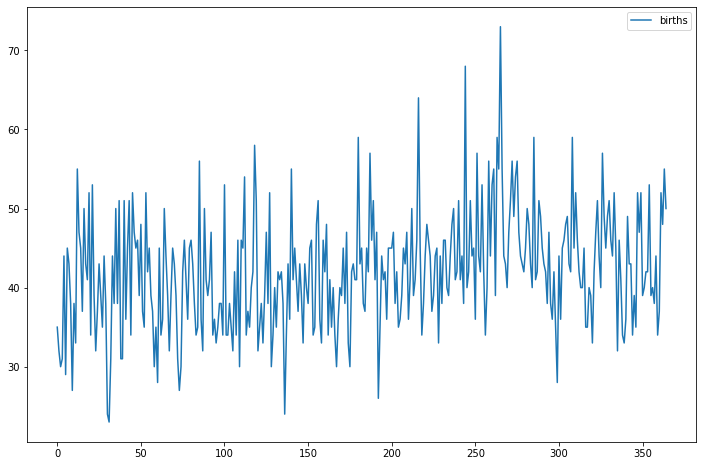

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd

import pymannkendall as mk
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline


df= pd.read_csv("daily-total-female-births-CA.csv")
print(df.head())
df.plot(figsize=(12,8));
plt.show()

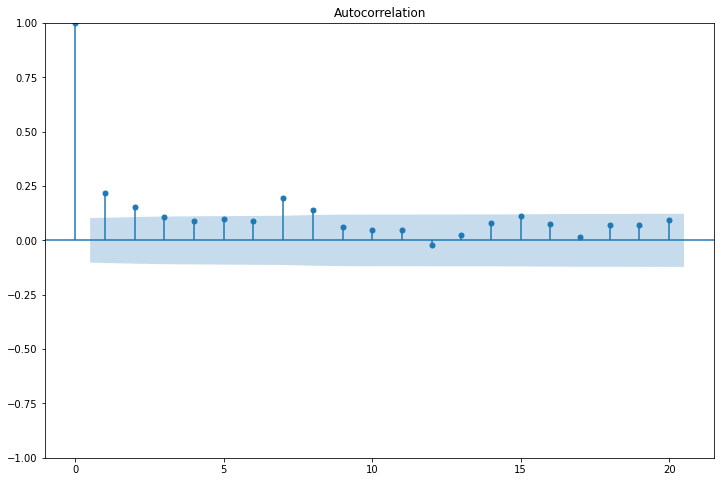

In [3]:
df['dated'] = pd.to_datetime(df['date'])
df = df.set_index('dated')
df.drop(['date'], axis=1, inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.tsa.plot_acf(df, lags=20, ax=ax)
plt.show()


From this ACF plot, it shows slight autocorrelation in the first lag. We can ignore it. So, in our demonstration, we assume that there is no autocorrelation in Daily Female Births Dataset. So, to check the trend in this dataset, we can use the Original Mann Kendall test.

In [4]:

print(mk.original_test(df, alpha=0.05))

Mann_Kendall_Test(trend='increasing', h=True, p=1.144585319856617e-07, z=5.302131199455321, Tau=0.18569923227457474, s=12336.0, var_s=5412244.0, slope=0.019230769230769232, intercept=38.5)


From this result, we can say that there is a significant trend in this dataset. Because the p-value is smaller than alpha=0.05 so h=True. The trend is “increasing” and the value of trend/slope is 0.019230769230769232.

# Test 2 - Shampoo Sales

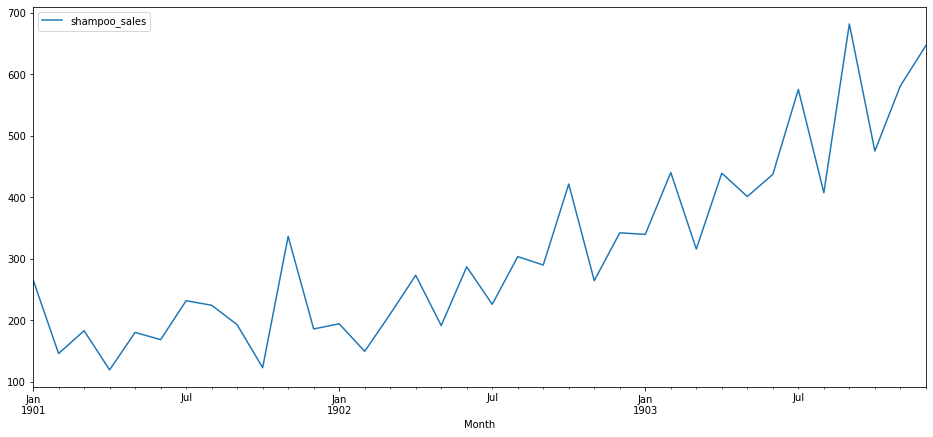

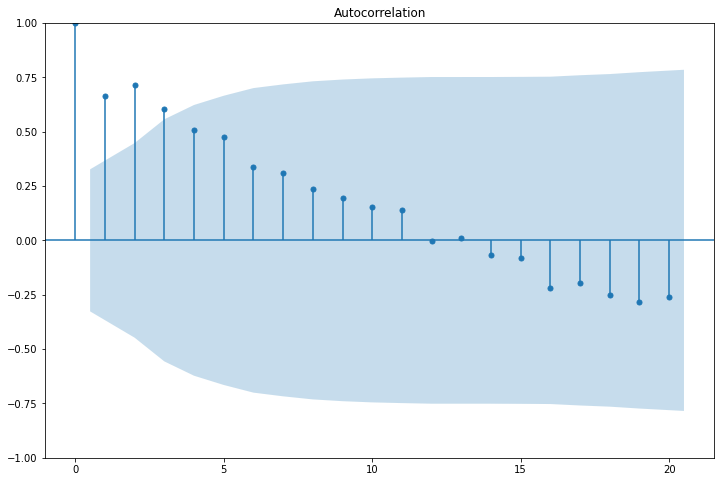

In [5]:
shampoo_df = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0)
shampoo_df.dropna(inplace=True) # Droping the last row which contains NaN
def preprocess_data(df):
    processed_df = df.rename(columns={
        'Sales of shampoo over a three year period': 'shampoo_sales'
    }).copy()

    processed_df['Month'] = pd.to_datetime(processed_df.Month.apply(lambda val: '190'+val))
    processed_df = processed_df.set_index('Month')

    return processed_df

processed_df = preprocess_data(shampoo_df)
# line plot
processed_df.plot(figsize=(16, 7));
plt.show()
fig, ax = plt.subplots(figsize=(12, 8))
sm.graphics.tsa.plot_acf(processed_df, lags=20, ax=ax);
plt.show()

From this ACF plot, we see autocorrelation in the first lag. So, modified Mann Kendall test should be applied in here.

We can use Hamed and Rao Modified MK Test, Yue and Wang Modified MK Test, Modified MK test using Pre-Whitening method or Modified MK test using Trend free Pre-Whitening method for this Shampoo dataset.

In [6]:
print (mk.hamed_rao_modification_test(processed_df))

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=True, p=2.8916160532688195e-07, z=5.130377554630905, Tau=0.6984126984126984, s=440.0, var_s=7322.011164105283, slope=11.509375, intercept=78.73593749999998)


Hamed and Rao Modified MK Test shows that there is a significant trend in this dataset. We can check this using other modified tests.

In [8]:
print(mk.yue_wang_modification_test(processed_df), "\n")
print(mk.trend_free_pre_whitening_modification_test(processed_df), "\n")
print(mk.pre_whitening_modification_test(processed_df), "\n")

Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='increasing', h=True, p=4.89164264649844e-13, z=7.228299591844884, Tau=0.6984126984126984, s=440.0, var_s=3688.5591437515122, slope=11.509375, intercept=78.73593749999998) 

Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='increasing', h=True, p=1.2152931994080518e-09, z=6.078212917371978, Tau=0.7210084033613445, s=429.0, var_s=4958.333333333333, slope=11.509375, intercept=78.73593749999998) 

Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='increasing', h=True, p=0.002860908222931835, z=2.982300730486251, Tau=0.3546218487394958, s=211.0, var_s=4958.333333333333, slope=11.509375, intercept=78.73593749999998) 



All these modified tests indicate that there is a significant increasing trend.

# Test 3 - Air Passengers

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


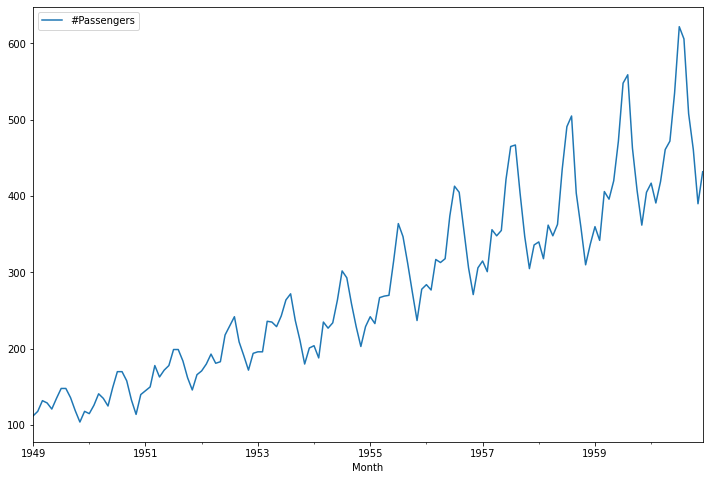

In [9]:
Passenger_data = pd.read_csv("AirPassengers.csv",parse_dates=['Month'],index_col='Month')
print(Passenger_data.head())
Passenger_data.plot(figsize=(12,8))
plt.show()

From this graph, we can easily notice that there is seasonality. So, we are going to use Seasonal MK Test on this monthly dataset. Since we have monthly data, so here we will use period=12.

In [10]:
print(mk.seasonal_test(Passenger_data,period=12))

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=15.50571052301472, Tau=0.98989898989899, s=784.0, var_s=2550.0, slope=30.23611111111111, intercept=85.3431712962963)


According to the result, this dataset also has a significant increasing trend.